In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gamma
np.random.seed(43)

In [ ]:
import numpy as np
from scipy.stats import gamma
from scipy.integrate import quad

def compute_lambda_hat(X):
    return np.mean(X)

def compute_k_hat(X):
    log_X = np.log(X)
    mean_log_X = np.mean(log_X)
    mean_X = np.mean(X)
    return 1

def empirical_transformation(X, k, lam, t):
    n = len(X)
    term1 = np.mean([(k - 1)/x - 1/lam for x in X])
    term2 = np.mean([min(x, t) for x in X])
    return term1 * term2

def test_statistic(X, k_hat, lambda_hat, weight_func):
    n = len(X)
    Y = X / lambda_hat
    def integrand(t):
        term1 = np.mean([(k_hat - 1)/y + 1 for y in Y])
        term2 = np.mean([min(y, t) for y in Y])
        term3 = np.mean([1 if y <= t else 0 for y in Y])
        return (np.sqrt(n) * (term1 * term2 - term3))**2 * weight_func(t)

    integral, _ = quad(integrand, 0, max(Y), limit=100)
    return integral

def weight_function(t, a=1):
    return np.exp(-a * t)

def goodness_of_fit_test(X, a=1):
    lambda_hat = compute_lambda_hat(X)
    k_hat = compute_k_hat(X)
    weight_func = lambda t: weight_function(t, a)
    G_n = test_statistic(X, k_hat, lambda_hat, weight_func)
    return G_n

def bootstrap_critical_value(X, num_bootstrap=10, alpha=0.05):
    n = len(X)
    lambda_hat = compute_lambda_hat(X)
    k_hat = compute_k_hat(X)
    print(lambda_hat, k_hat)

    bootstrap_stats = []

    for _ in range(num_bootstrap):
        bootstrap_sample = gamma.rvs(a=k_hat, scale=lambda_hat, size=n)
        bootstrap_stat = goodness_of_fit_test(bootstrap_sample, a=1)
        bootstrap_stats.append(bootstrap_stat)

    critical_value = np.percentile(bootstrap_stats, 100 * (1 - alpha))
    return critical_value

# Пример использования:
np.random.seed(123)
# X = gamma.rvs(a=2, scale=2, size=1000)  # Генерация данных из гамма-распределения
X = data_100000_alpha2_beta1[0::1000]
G_n = goodness_of_fit_test(X, a=1)
critical_value = bootstrap_critical_value(X, num_bootstrap=10, alpha=0.05)

print(f"Test statistic G_n: {G_n}")
print(f"Critical value at alpha = 0.05: {critical_value}")
print(f"Reject H0: {G_n > critical_value}")

# Интерпретация
if G_n > critical_value:
    print("Reject the null hypothesis: The data does not follow a Gamma distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows a Gamma distribution.")

<ipython-input-144-2d2d04b52b65>:29: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, 0, max(Y), limit=100)


1.7871417299999999 1
Test statistic G_n: 2.2587004705735474
Critical value at alpha = 0.05: 0.4682937878005379
Reject H0: True
Reject the null hypothesis: The data does not follow a Gamma distribution.


# Gamma distribution with N=100 samples, shape=2, shift=0, scale=1

In [2]:
with open('/content/data_N100000_alpha2_beta1.txt', 'r') as file:
    content = file.read()
    numbers_list = content.split()
    data_100000_alpha2_beta1 = [float(number) for number in numbers_list[:100000]]

FileNotFoundError: [Errno 2] No such file or directory: '/content/data_N100000_alpha2_beta1.txt'

In [3]:
# for num in data_100000_alpha2_beta1:
#   if num == 0:
#     num = 0.000001

# import os
# filename = '/content/data_N100000_alpha2_beta1.txt'
# if os.path.exists(filename):
#     os.remove(filename)

# with open(filename, 'w') as file:
#     content = ' '.join(map(str, data_100000_alpha2_beta1))
#     file.write(content)

In [4]:
%%time
data_alpha2_beta1_gen = np.random.gamma(alpha, beta, N)


NameError: name 'alpha' is not defined

In [5]:
%%time

data_alpha2_beta1_gen = gamma.rvs(a=alpha, scale=beta, size=N)

NameError: name 'gamma' is not defined

In [6]:
%%time

uniform_random_numbers = np.random.uniform(0, 1, N)
data_alpha2_beta1_gen = gamma.ppf(uniform_random_numbers, a=alpha, scale=beta)

NameError: name 'N' is not defined

In [7]:
N = 100000
alpha = 2.0
beta = 1.0

data_alpha2_beta1_gen = np.random.gamma(alpha, beta, N)


# uniform_random_numbers = np.random.uniform(0, 1, N)
# data_alpha2_beta1_gen = gamma.ppf(uniform_random_numbers, a=alpha, scale=beta)


# data_alpha2_beta1_gen = gamma.rvs(a=alpha, scale=beta, size=N)


count, bins, ignored = plt.hist(data_100000_alpha2_beta1, 40, density=True, alpha=0.5, color='g', label='algorithm')
count2, bins2, ignored2 = plt.hist(data_alpha2_beta1_gen, 40, density=True, alpha=0.5, color='b', label='reference')
# y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)


gamma_theor = np.linspace(min(data_100000_alpha2_beta1), max(data_100000_alpha2_beta1), N)
y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)
plt.plot(gamma_theor, stats.gamma.pdf(gamma_theor, alpha, 0, beta), 'r-', lw=2)

plt.title('N=100000, shape=2, scale=1')
plt.legend()
plt.show()

NameError: name 'data_100000_alpha2_beta1' is not defined

In [ ]:
for cnt in range(0,100):
  statistic_ref = []
  pvalues_ref = []
  data_alpha2_beta1_gen = np.random.gamma(alpha, beta, N)
  for i in range(0, 50):
    numbers_ref = data_alpha2_beta1_gen[(i * 2000):((i+1)*2000)]
    ks_statistic, ks_p_value = stats.kstest(numbers_ref, 'gamma', args=(alpha, 0, beta))
    statistic_ref.append(ks_statistic)

  mean_ks_ref = np.array(statistic_ref).mean()
  print("mean AD for reference: ", mean_ks_ref)
  if (mean_ks_ref >= 0.0215):
    break


In [ ]:
# multiple runs of KS test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha2_beta1[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha2_beta1_gen[(i * 2000):((i+1)*2000)]
  ks_statistic, ks_p_value = stats.kstest(numbers, 'gamma', args=(alpha, 0, beta))
  statistic.append(ks_statistic)
  pvalues.append(ks_p_value)
  ks_statistic_ref, ks_p_value_ref = stats.kstest(numbers_ref, 'gamma', args=(alpha, 0, beta))
  statistic_ref.append(ks_statistic_ref)
  pvalues_ref.append(ks_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_ks_alg = np.array(statistic).mean()
print("mean KS for algorithm: ", mean_ks_alg)
mean_ks_ref = np.array(statistic_ref).mean()
print("mean KS for reference: ", mean_ks_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_ks_alg for _ in x_axis], label="mean KS, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_ks_ref for _ in x_axis], label="mean KS, reference", linestyle="dotted", color='black')
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("KS statistics over 50 runs")
ax2.set_title("KS p-values over 50 runs")
plt.show()


In [ ]:
# multiple runs of CVM test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha2_beta1[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha2_beta1_gen[(i * 2000):((i+1)*2000)]
  result = stats.cramervonmises(numbers, 'gamma', args=(alpha, 0, beta))
  cvm_statistic, cvm_p_value = result.statistic, result.pvalue
  statistic.append(cvm_statistic)
  pvalues.append(cvm_p_value)
  result = stats.cramervonmises(numbers_ref, 'gamma', args=(alpha, 0, beta))
  cvm_statistic_ref, cvm_p_value_ref = result.statistic, result.pvalue
  statistic_ref.append(cvm_statistic_ref)
  pvalues_ref.append(cvm_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_cvm_alg = np.array(statistic).mean()
print("mean CVM for algorithm: ", mean_cvm_alg)
mean_cvm_ref = np.array(statistic_ref).mean()
print("mean CVM for reference: ", mean_cvm_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_ks_alg for _ in x_axis], label="mean CVM, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_ks_ref for _ in x_axis], label="mean CVM, reference", linestyle="dotted", color='black')
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("CVM statistics over 50 runs")
ax2.set_title("CVM p-values over 50 runs")
plt.show()

In [ ]:
import os
filename = 'dataref_100000_alpha2_beta1.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_alpha2_beta1_gen))
    file.write(content)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

stats.probplot(data_100000_alpha2_beta1, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[0])
axs[0].set_title('algorithm: N=100000, shape=2, scale=1')

stats.probplot(data_alpha2_beta1_gen, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[1])
axs[1].set_title('reference: N=100000, shape=2,scale=1')


**Tests results for Gamma(2, 0, 1)**

In [ ]:
#AD multiple runs

ad_stats = list(map(float,"0.7674500 0.9660093 0.4205133 0.4778319 0.9190027 0.8593445 0.6584448 3.8402694 0.5916390 2.4655148 0.5880666 0.4354659 1.2815683 3.0374644 0.3774354 0.7530032 0.6754592 1.3543144 0.6038361 3.1800069 1.5207971 2.4671720 0.8335279 0.6749049 0.4701533 2.2821504 0.2420941 0.4366170 1.6274272 0.6369346 1.2980316 0.7100268 0.8718622 0.6520503 1.8689826 0.4840196 1.7497556 0.2934640 5.4950063 0.6812554 0.3690773 0.4721372 0.8957631 0.2777020 0.3214156 0.4337761 0.6010936 0.9280964 1.8022900 0.5419398".split()))
# ad_cv = list(map(float,"0.7774991 0.7952874 0.7492180 0.9182390 0.7693730 0.7131498 0.7929481 0.9054387 0.8106929 0.7595442 0.9150111 0.7821344 0.6605670 0.7824363 0.9131130 0.8548481 0.7721683 0.7909497 0.6844001 0.7262973 0.8634974 0.7879717 0.7785844 0.7921974 0.8393803 0.7848303 0.7755364 0.6432830 0.6934170 0.7051635 0.7763145 0.7572782 0.8537546 1.0086102 0.7890669 0.7087345 0.7582199 0.7850914 0.6540313 0.7817150 0.7483018 0.9202063 0.7905028 0.7304469 0.6752523 0.8038723 0.9167329 0.8542361 0.7657119 0.8239593".split()))
mean_ad_alg = np.array(ad_stats).mean()

ad_stats_ref = list(map(float,"0.8217644 1.2261496 4.7467900 2.1847133 0.5643914 0.6185911 1.1641420 0.9295856 1.1481202 0.9256306 1.7936137 0.6465196 3.3218165 0.5857887 1.4485609 0.3584973 0.8176999 3.1140324 0.6532317 1.0919803 2.0252274 1.0079711 0.9059980 1.2087529 1.5072639 1.0194346 1.0972671 0.7316496 1.1635051 3.1755763 0.3065045 3.2167068 1.9904586 3.2066511 3.5560166 0.4151822 0.8733851 0.2649124 2.9831237 1.5963428 0.7987757 1.9898159 1.2879131 1.0392140 0.5408973 0.8198232 0.7630708 0.7465091 1.5705834 0.4881545".split()))
# ad_cv_ref = list(map(float,"0.8263748 0.7031705 0.7712405 0.7164126 0.9837639 0.8010715 0.7343425 0.7321798 0.7266570 0.5826916 0.9087527 0.8513874 0.7550629 0.6800672 0.6646389 0.9011487 0.7889302 0.8320924 0.8594704 0.6665863 0.7575895 0.7033055 0.7641696 0.7621389 0.8682665 0.8137996 0.7459979 0.7786595 0.7131650 0.7601674 0.7095698 0.7861547 0.7855972 0.9272681 0.8024989 0.8390439 0.8205575 0.8154639 0.7801314 0.8736603 0.8981371 0.7795476 0.8959003 0.7204677 0.8643828 0.7767517 0.8266121 0.7945153 0.8082451 0.9935676".split()))
mean_ad_ref = np.array(ad_stats_ref).mean()

print("mean AD-deviation for algorithm under study: ", mean_ad_alg)
print("mean AD-deviation for reference: ", mean_ad_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, ad_stats, label='AD value')
# ax1.plot(x_axis, ad_cv, label='AD critical values')
ax1.plot([mean_ad_alg for i in range (0,49)], label='average AD', color='black')
ax1.set_title('Anderson-Darling test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, ad_stats_ref, label='AD value')
# ax2.plot(x_axis, ad_cv_ref, label='AD critical values')
ax2.plot([mean_ad_ref for i in range (0,49)], label='average AD', color='black')
ax2.set_title('Anderson-Darling test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
#BE multiple runs

be_stats_alg = list(map(float,"0.03629080 0.05398328 0.03131053 0.02426847 0.11037586 0.17981680 0.14297510 0.91672572 0.01604138 0.89091865 0.07978945 0.03974954 0.14369973 0.82608858 0.04345228 0.07405919 0.11382117 0.36319403 0.03291534 0.51477300 0.17933413 0.52089561 0.15110999 0.03623722 0.05907943 0.62584944 0.01723304 0.03656229 0.46105708 0.07105998 0.34007497 0.08624331 0.14732040 0.16400478 0.14011304 0.02351941 0.44933761 0.01876585 1.35124360 0.06097707 0.01971711 0.04951254 0.11962758 0.02206418 0.07707439 0.03860049 0.07352346 0.14530657 0.43080924 0.04984007".split()))
# ad_cv = list(map(float,"0.3020004 0.2131477 0.2270414 0.2138603 0.1955775 0.2387698 0.2559284 0.2044658 0.2258046 0.1888097 0.1883650 0.2481693".split()))
mean_be_alg = np.array(be_stats_alg).mean()

be_stats_ref = list(map(float,"0.01310894 0.42102299 0.77100714 0.47660937 0.03827973 0.06426030 0.26586415 0.19274184 0.07845659 0.13710393 0.41712968 0.11729674 0.91268105 0.03492161 0.14716418 0.03860283 0.10350648 0.66747177 0.09931145 0.30899171 0.51949926 0.07990026 0.04303533 0.14962323 0.25857744 0.26745635 0.12044479 0.06372207 0.30745945 0.75151298 0.03760984 0.75932930 0.38800120 0.74532338 0.63488303 0.03154174 0.14093565 0.03068478 0.05805738 0.28649991 0.02562084 0.10151358 0.34379938 0.08427213 0.12106511 0.04286649 0.11573180 0.10312952 0.34118395 0.04643973".split()))
# ad_cv_ref = list(map(float,"0.2525793 0.2505663 0.1880365 0.2225206 0.2150800 0.2028999 0.1945767 0.1999666 0.1930830 0.1980472 0.2264772 0.1870498 0.2723001 0.1538940 0.1979718 0.2251270 0.1826439 0.2219491 0.2114048 0.2179567".split()))
mean_be_ref = np.array(be_stats_ref).mean()

print("mean BE-deviation for algorithm under study: ", mean_be_alg)
print("mean BE-deviation for reference: ", mean_be_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, be_stats_alg, label='BE value')
# ax1.plot(x_axis, ad_cv, label='BE critical values')
ax1.plot([mean_be_alg for i in range (0,50)], label='average BE', color='black')
ax1.set_title('Betsch-Ebner test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, be_stats_ref, label='BE value')
# ax2.plot(x_axis, ad_cv_ref, label='BE critical values')
ax2.plot([mean_be_ref for i in range (0,50)], label='average BE', color='black')
ax2.set_title('Betsch-Ebner test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("N=100000, shape=2, shift=0, scale=1")
print("")
df = pd.DataFrame([[mean_ks_alg, mean_cvm_alg, mean_ad_alg, mean_be_alg], [mean_ks_ref, mean_cvm_ref, mean_ad_ref, mean_be_ref]],
                  columns=['KS', 'CVM', 'AD', 'BE'],
                  index=['algorithm', 'reference'])

print(df)

print("")
df1 = pd.DataFrame([[mean_ks_ref/mean_ks_alg, mean_cvm_ref/mean_cvm_alg, mean_ad_ref/mean_ad_alg, mean_be_ref/mean_be_alg]],
                  columns=['KS ratio', 'CVM ratio', 'AD ratio', 'BE ratio'],
                  index=['ratio'])

print(df1)

# Gamma distribution with N=100 samples, shape=4, shift=0, scale=3

data for n=100, alpha=4, a=0, beta=3

 0.139526,  3.143625,  9.569369,  10.734315,  12.425990,  10.335268,  20.404652,  32.123154,  12.271347,  6.531026,  13.426448,  6.233157,  5.111036,  7.070692,  17.739464,  20.095720,  10.343471,  1.608410 , 12.523994,  15.118665,  14.784235,  9.164590,  18.054358,  13.843029,  15.013857,  7.747275,  12.817463,  24.167683,  19.301908,  4.861847,  15.407166,  20.505241,  14.288136,  6.164851,  19.305384,  5.483424,  18.615545,  14.239748,  7.899610,  9.930749,  15.836873,  15.057060,  9.501493,  10.195506,  11.411544,  25.669550,  11.919246,  17.737823,  11.105445,  2.898423,  2.708142,  18.714249,  11.552521,  5.252846,  3.994699,  9.567242,  11.288247,  12.818955,  10.710919,  7.315724,  14.772247,  9.220647,  25.040234,  10.852714,  12.085093,  7.328438,  3.814405,  20.571688,  7.431067,  6.080602,  14.053664,  5.139197,  10.802377,  10.332296,  10.642056,  26.912743,  13.692908,  11.458222,  19.954374,  15.306012,  8.908192,  9.656713,  10.045837,  11.228527,  22.262157, 18.729610,  18.760738,  10.390862,  14.912505,  5.211968,  10.164472,  4.916315,  16.511379,  10.675909,  11.771478,  10.972247,  11.430909,  9.420319,  19.290258,  11.201659

In [ ]:
data_alpha4_beta3 = [0.139526, 3.143625, 9.569369, 10.734315, 12.425990, 10.335268, 20.404652, 32.123154, 12.271347, 6.531026, 13.426448, 6.233157, 5.111036, 7.070692, 17.739464, 20.095720, 10.343471, 1.608410 , 12.523994, 15.118665, 14.784235, 9.164590, 18.054358, 13.843029, 15.013857, 7.747275, 12.817463, 24.167683, 19.301908, 4.861847, 15.407166, 20.505241, 14.288136, 6.164851, 19.305384, 5.483424, 18.615545, 14.239748, 7.899610, 9.930749, 15.836873, 15.057060, 9.501493, 10.195506, 11.411544, 25.669550, 11.919246, 17.737823, 11.105445, 2.898423, 2.708142, 18.714249, 11.552521, 5.252846, 3.994699, 9.567242, 11.288247, 12.818955, 10.710919, 7.315724, 14.772247, 9.220647, 25.040234, 10.852714, 12.085093, 7.328438, 3.814405, 20.571688, 7.431067, 6.080602, 14.053664, 5.139197, 10.802377, 10.332296, 10.642056, 26.912743, 13.692908, 11.458222, 19.954374, 15.306012, 8.908192, 9.656713, 10.045837, 11.228527, 22.262157, 18.729610, 18.760738, 10.390862, 14.912505, 5.211968, 10.164472, 4.916315, 16.511379, 10.675909, 11.771478, 10.972247, 11.430909, 9.420319, 19.290258, 11.201659]

In [ ]:
with open('/content/data_N100000_alpha4_beta3.txt', 'r') as file:
    content = file.read()
    numbers_list = content.split()
    data_100000_alpha4_beta3 = [float(number) for number in numbers_list[:100000]]

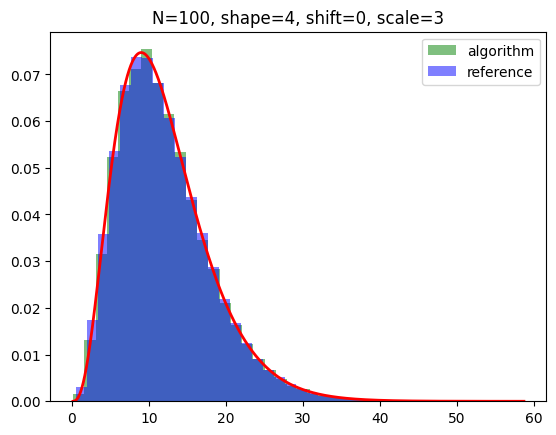

In [ ]:
N = 100000
alpha = 4
beta = 3

data_alpha4_beta3_gen = np.random.gamma(alpha, beta, N)

count, bins, ignored = plt.hist(data_100000_alpha4_beta3, 40, density=True, alpha=0.5, color='g', label='algorithm')
count2, bins2, ignored2 = plt.hist(data_alpha4_beta3_gen, 40, density=True, alpha=0.5, color='b', label='reference')
y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)


gamma_theor = np.linspace(min(data_100000_alpha4_beta3), max(data_100000_alpha4_beta3), N)
plt.plot(gamma_theor, stats.gamma.pdf(gamma_theor, alpha, 0, beta), 'r-', lw=2)

plt.title('N=100, shape=4, shift=0, scale=3')
plt.legend()
plt.show()

In [ ]:
# for i in range(0,len(data_100000_alpha05_beta9)):
#   if data_100000_alpha05_beta9[i] < 0.000001:
#     print(data_100000_alpha05_beta9[i])
#     data_100000_alpha05_beta9[i] = 0.000001

import os
filename = '/content/dataref_N100000_alpha4_beta3.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_alpha4_beta3_gen))
    file.write(content)

Text(0.5, 1.0, 'reference: N=100, shape=4, shift=0, scale=3')

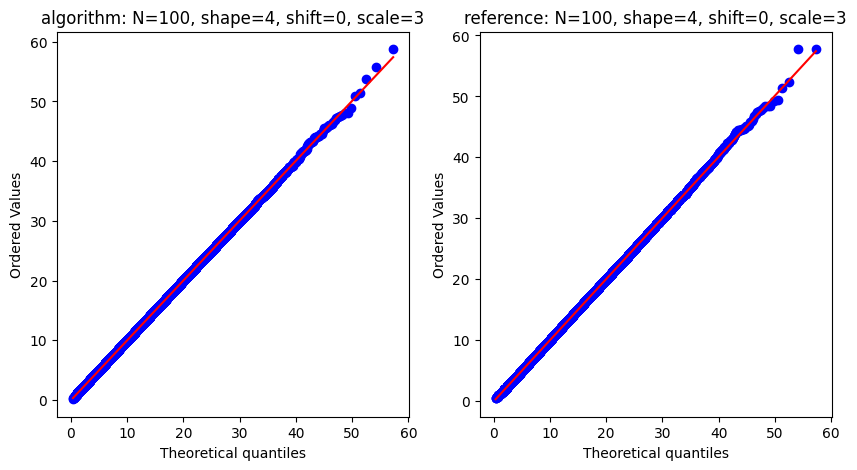

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

stats.probplot(data_100000_alpha4_beta3, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[0])
axs[0].set_title('algorithm: N=100, shape=4, shift=0, scale=3')

stats.probplot(data_alpha4_beta3_gen, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[1])
axs[1].set_title('reference: N=100, shape=4, shift=0, scale=3')


**Tests results for Gamma(4, 0, 3)**

In [ ]:
# Kolmogorov - Smirnov test

# algorithm
ks_statistic, ks_p_value = stats.kstest(data_100000_alpha4_beta3, 'gamma', args=(alpha, 0, beta))
print(f'K-S statistic for algorithm: {ks_statistic}, K-S p-value for algorithm: {ks_p_value}')

# reference
ks_statistic_ref, ks_p_value_ref = stats.kstest(data_alpha4_beta3_gen, 'gamma', args=(alpha, 0, beta))
print(f'K-S statistic for reference: {ks_statistic_ref}, K-S p-value for reference: {ks_p_value_ref}')

K-S statistic for algorithm: 0.002070428205521946, K-S p-value for algorithm: 0.7838318529031977
K-S statistic for reference: 0.0023655193416722564, K-S p-value for reference: 0.6295761755569946


mean AD for algorithm:  0.02039930470433833
mean AD for reference:  0.020188811221182018


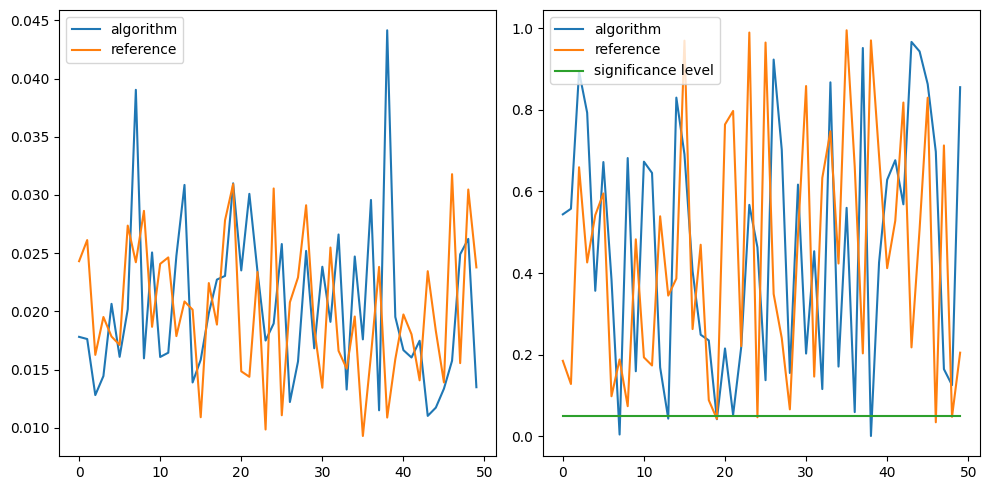

In [ ]:
# multiple runs of KS test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha4_beta3[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha4_beta3_gen[(i * 2000):((i+1)*2000)]
  ks_statistic, ks_p_value = stats.kstest(numbers, 'gamma', args=(alpha, 0, beta))
  statistic.append(ks_statistic)
  pvalues.append(ks_p_value)
  ks_statistic_ref, ks_p_value_ref = stats.kstest(numbers_ref, 'gamma', args=(alpha, 0, beta))
  statistic_ref.append(ks_statistic_ref)
  pvalues_ref.append(ks_p_value_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level")
ax2.legend()

mean_alg = np.array(statistic).mean()
print("mean AD for algorithm: ", mean_alg)

mean_ref = np.array(statistic_ref).mean()
print("mean AD for reference: ", mean_ref)

plt.tight_layout()
plt.show()


In [ ]:
# Cramer-von-Mises test
# algorithm
cvm_result = stats.cramervonmises(data_100000_alpha4_beta3, 'gamma', args=(alpha, 0, beta))
print(f'CVM statistic for algorithm: {cvm_result.statistic}, CVM p-value for algorithm: {cvm_result.pvalue}')

cvm_statistic = cvm_result.statistic
cvm_p_value = cvm_result.pvalue

# reference
cvm_result = stats.cramervonmises(data_alpha4_beta3_gen, 'gamma', args=(alpha, 0, beta))
print(f'CVM statistic for reference: {cvm_result.statistic}, CVM p-value for reference: {cvm_result.pvalue}')

cvm_statistic_ref = cvm_result.statistic
cvm_p_value_ref = cvm_result.pvalue

CVM statistic for algorithm: 0.09618380935164489, CVM p-value for algorithm: 0.6039096952569799
CVM statistic for reference: 0.10069019170834058, CVM p-value for reference: 0.5815011414860974


mean CVM for algorithm:  0.20169212913451814
mean CVM for reference:  0.18962582425551713


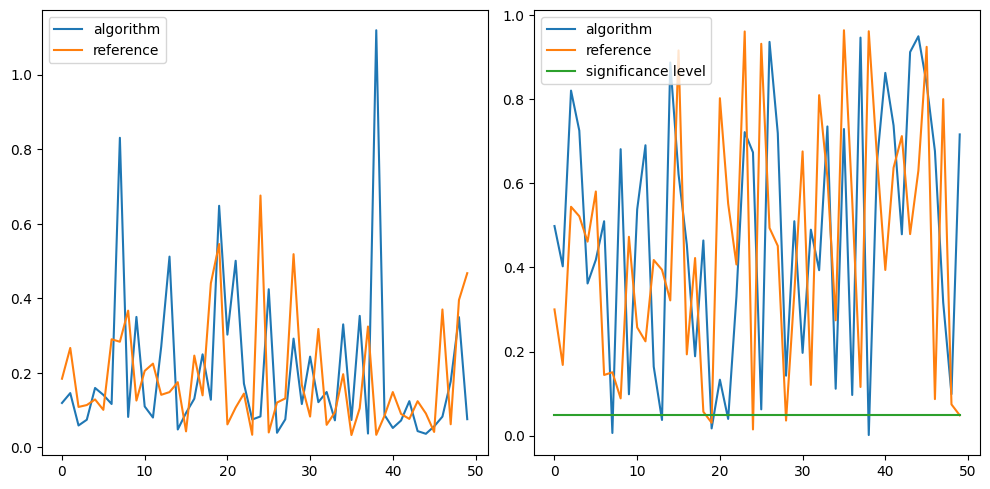

In [ ]:
# multiple runs of CVM test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha4_beta3[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha4_beta3_gen[(i * 2000):((i+1)*2000)]
  result = stats.cramervonmises(numbers, 'gamma', args=(alpha, 0, beta))
  statistic.append(result.statistic)
  pvalues.append(result.pvalue)
  result = stats.cramervonmises(numbers_ref, 'gamma', args=(alpha, 0, beta))
  statistic_ref.append(result.statistic)
  pvalues_ref.append(result.pvalue)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level")
ax2.legend()

mean_alg = np.array(statistic).mean()
print("mean CVM for algorithm: ", mean_alg)

mean_ref = np.array(statistic_ref).mean()
print("mean CVM for reference: ", mean_ref)

plt.tight_layout()
plt.show()

In [ ]:
# Anderson-Darling test (computed in R) for algoritm only
# because there is unknown algorithm underlying RNG and gamma generation in R

# > test.AD(data, boot = 500, alpha = 0.05)

ALGORITHM

AD                          =  0.2868788  
critical value              =   0.7468168  
estimated parameters        =  3.974309 3.021412  
significance level          =  0.05  
number of bootstrap samples =  500  

Gamma-hypothesis cannot be rejected  

REFERENCE

AD                          =  0.3054629  
critical value              =   0.8119284  
estimated parameters        =  3.988748 3.012439  
significance level          =  0.05  
number of bootstrap samples =  500  

Gamma-hypothesis cannot be rejected  

mean AD for algorithm:  0.36343068199999995
mean AD for reference:  0.367890924


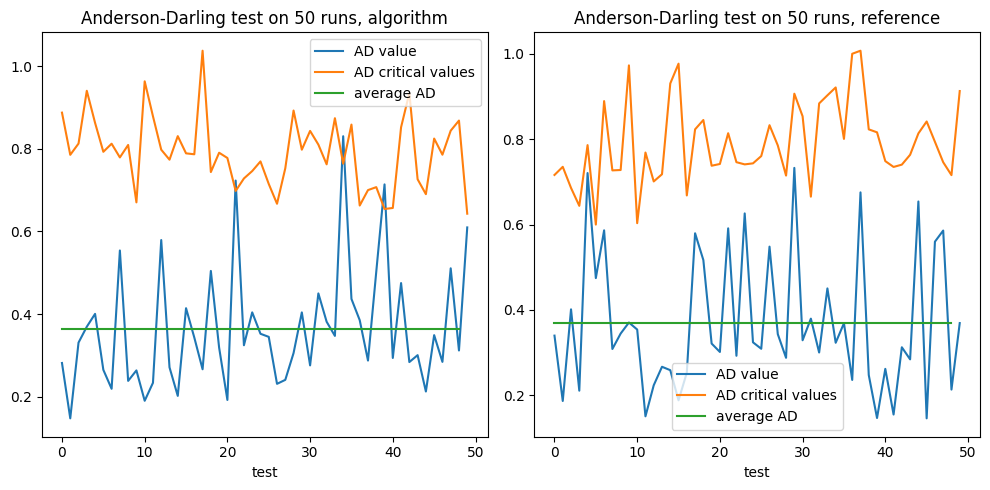

In [ ]:
#AD multiple runs

ad_stats = list(map(float,"0.2819440 0.1480976 0.3312523 0.3696338 0.4007306 0.2654085 0.2195512 0.5540278 0.2386786 0.2639989 0.1905709 0.2339956 0.5792890 0.2714486 0.2023640 0.4144917 0.3433999 0.2667127 0.5045577 0.3191270 0.1925637 0.7231001 0.3248662 0.4043577 0.3526026 0.3451160 0.2315091 0.2411562 0.3059335 0.4043386 0.2761462 0.4502393 0.3816774 0.3474595 0.8303124 0.4368363 0.3854793 0.2878515 0.5027092 0.7138214 0.2941059 0.4752132 0.2842024 0.3008933 0.2129356 0.3493283 0.2845993 0.5109071 0.3122042 0.6097882".split()))
ad_cv = list(map(float,"0.8873682 0.7853501 0.8125600 0.9402123 0.8626509 0.7926557 0.8122357 0.7790547 0.8092150 0.6703791 0.9630632 0.8785890 0.7977452 0.7736019 0.8305409 0.7889315 0.7866467 1.0371091 0.7436924 0.7904200 0.7776918 0.6980301 0.7282169 0.7460483 0.7694058 0.7149444 0.6670058 0.7527578 0.8924772 0.7977755 0.8431762 0.8100922 0.7623644 0.8739661 0.7639338 0.8584294 0.6627428 0.7000587 0.7072018 0.6543897 0.6568052 0.8520273 0.9345899 0.7262391 0.6902170 0.8246653 0.7856527 0.8437335 0.8681795 0.6429837".split()))
mean_alg = np.array(ad_stats).mean()
print("mean AD for algorithm: ", mean_alg)

ad_stats_ref = list(map(float,"0.3394173 0.1861615 0.4010498 0.2103109 0.7206832 0.4743428 0.5863437 0.3080843 0.3442630 0.3701558 0.3537018 0.1501279 0.2229872 0.2663563 0.2583741 0.1877346 0.2525133 0.5794729 0.5166289 0.3208189 0.3010987 0.5910042 0.2921522 0.6260241 0.3237333 0.3085743 0.5480926 0.3429178 0.2873610 0.7327714 0.3285296 0.3792323 0.2997698 0.4501067 0.3226764 0.3685708 0.2355031 0.6753462 0.2469687 0.1461538 0.2615120 0.1544048 0.3121069 0.2837502 0.6539976 0.1454299 0.5596982 0.5858231 0.2128808 0.3688275".split()))
ad_cv_ref = list(map(float,"0.7162020 0.7352680 0.6857911 0.6437870 0.7861667 0.5998160 0.8894133 0.7269142 0.7278163 0.9731662 0.6031121 0.7688138 0.7009824 0.7178924 0.9307517 0.9771922 0.6681681 0.8231708 0.8450746 0.7378359 0.7419405 0.8140616 0.7461559 0.7410040 0.7433889 0.7604771 0.8328936 0.7855385 0.7147045 0.9067903 0.8538049 0.6653043 0.8839467 0.9029454 0.9214025 0.8007555 1.0003786 1.0075623 0.8231269 0.8161558 0.7486464 0.7349707 0.7404036 0.7634851 0.8136084 0.8416072 0.7939866 0.7460413 0.7157942 0.9129765".split()))
mean_ref = np.array(ad_stats_ref).mean()
print("mean AD for reference: ", mean_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, ad_stats, label='AD value')
ax1.plot(x_axis, ad_cv, label='AD critical values')
ax1.plot([mean_alg for i in range (0,49)], label='average AD')
ax1.set_title('Anderson-Darling test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, ad_stats_ref, label='AD value')
ax2.plot(x_axis, ad_cv_ref, label='AD critical values')
ax2.plot([mean_ref for i in range (0,49)], label='average AD')
ax2.set_title('Anderson-Darling test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("N=100000, shape=4, shift=0, scale=3")
print("")
df = pd.DataFrame([[ks_statistic, ks_p_value, cvm_statistic, cvm_p_value, 0.2868788, 0.7468168], [ks_statistic_ref, ks_p_value_ref, cvm_statistic_ref, cvm_p_value_ref, 0.3054629, 0.8119284]],
                  columns=['KS', 'KS p-value', 'CVM', 'CVM p-value', 'AD', 'AD p-value'],
                  index=['algorithm', 'reference'])

print(df)

N=100000, shape=4, shift=0, scale=3

                 KS  KS p-value       CVM  CVM p-value        AD  AD p-value
algorithm  0.002070    0.783832  0.096184     0.603910  0.286879    0.746817
reference  0.002366    0.629576  0.100690     0.581501  0.305463    0.811928


# Gamma distribution with N=100000 samples, shape=0.5, shift=0, scale=9

In [ ]:
with open('/content/data_N100000_alpha05_beta9.txt', 'r') as file:
    content = file.read()
    numbers_list = content.split()
    data_100000_alpha05_beta9 = [float(number) for number in numbers_list[:100000]]

In [ ]:
for i in range(0,len(data_100000_alpha05_beta9)):
  if data_100000_alpha05_beta9[i] < 0.000001:
    print(data_100000_alpha05_beta9[i])
    data_100000_alpha05_beta9[i] = 0.000001

import os
filename = '/content/data_N100000_alpha05_beta9.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_100000_alpha05_beta9))
    file.write(content)

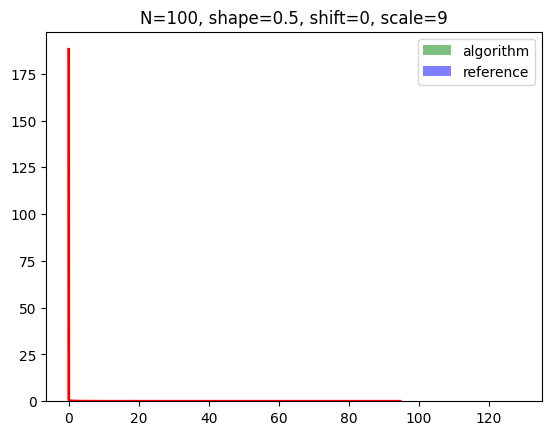

In [ ]:
N = 100000
alpha = 0.5
beta = 9

data_alpha05_beta9_gen = np.random.gamma(alpha, beta, N)

count, bins, ignored = plt.hist(data_100000_alpha05_beta9, 40, density=True, alpha=0.5, color='g', label='algorithm')
count2, bins2, ignored2 = plt.hist(data_alpha05_beta9_gen, 40, density=True, alpha=0.5, color='b', label='reference')
y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)


gamma_theor = np.linspace(min(data_100000_alpha05_beta9), max(data_100000_alpha05_beta9), N)
plt.plot(gamma_theor, stats.gamma.pdf(gamma_theor, alpha, 0, beta), 'r-', lw=2)

plt.title('N=100, shape=0.5, shift=0, scale=9')
plt.legend()
plt.show()

Text(0.5, 1.0, 'reference: N=100000, shape=0.5, shift=0, scale=9')

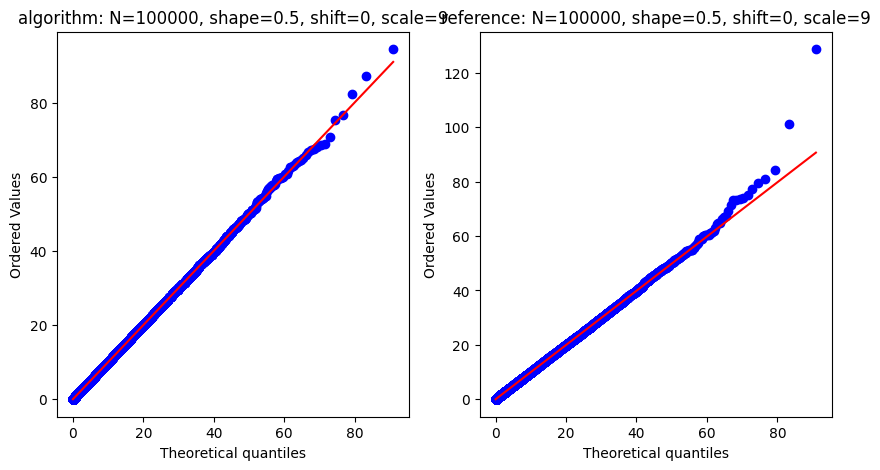

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

stats.probplot(data_100000_alpha05_beta9, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[0])
axs[0].set_title('algorithm: N=100000, shape=0.5, shift=0, scale=9')

stats.probplot(data_alpha05_beta9_gen, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[1])
axs[1].set_title('reference: N=100000, shape=0.5, shift=0, scale=9')

mean KS for algorithm:  0.020399822200271825
mean KS for reference:  0.018106251228732807


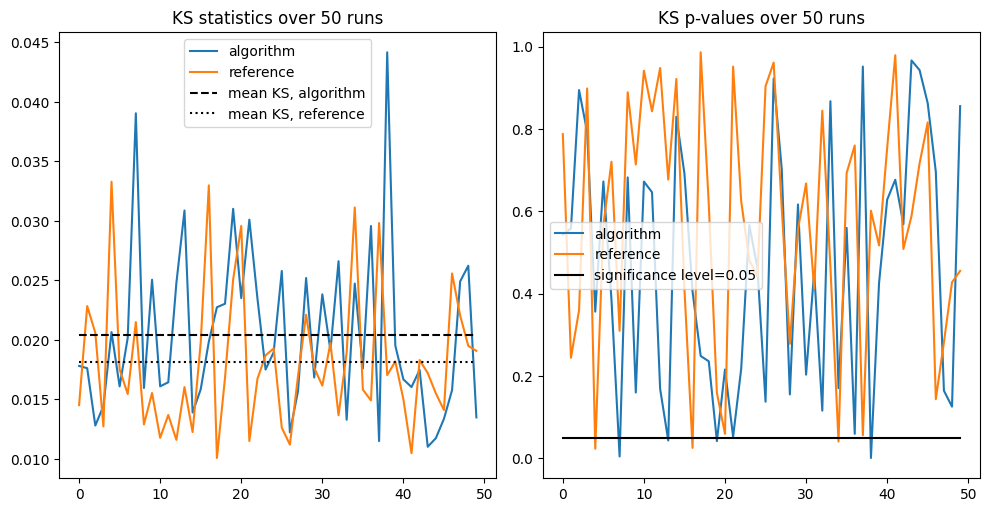

In [ ]:
# multiple runs of KS test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha05_beta9[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha05_beta9_gen[(i * 2000):((i+1)*2000)]
  ks_statistic, ks_p_value = stats.kstest(numbers, 'gamma', args=(alpha, 0, beta))
  statistic.append(ks_statistic)
  pvalues.append(ks_p_value)
  ks_statistic_ref, ks_p_value_ref = stats.kstest(numbers_ref, 'gamma', args=(alpha, 0, beta))
  statistic_ref.append(ks_statistic_ref)
  pvalues_ref.append(ks_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_ks_alg = np.array(statistic).mean()
print("mean KS for algorithm: ", mean_ks_alg)
mean_ks_ref = np.array(statistic_ref).mean()
print("mean KS for reference: ", mean_ks_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_ks_alg for _ in x_axis], label="mean KS, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_ks_ref for _ in x_axis], label="mean KS, reference", linestyle="dotted", color='black')
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("KS statistics over 50 runs")
ax2.set_title("KS p-values over 50 runs")
plt.show()


mean CVM for algorithm:  0.20169876140808132
mean CVM for reference:  0.14281873201942083
[0.4982573932777512, 0.4025793961946462, 0.8204800595876127, 0.7253846919768652, 0.3616025449428192, 0.41826884664976627, 0.5099485912064153, 0.0061779206448521196, 0.6815985028534494, 0.09831648216072064, 0.538132972178258, 0.6909157471312093, 0.163875964534003, 0.03718701237554567, 0.8875317599912373, 0.6218544876007424, 0.4540783982561769, 0.18873536677893776, 0.46443600134394614, 0.017040797055911328, 0.1329910431930632, 0.039657850439456466, 0.33100678026867625, 0.7219721244102753, 0.6737720417003659, 0.06236673147201388, 0.936347632630941, 0.7189977570546348, 0.1424986252285183, 0.5100062160037733, 0.1968447003914109, 0.4895383533301746, 0.3933817342346272, 0.7353052446194727, 0.11133199662700888, 0.7293971971895057, 0.09654988248806051, 0.9468425595765917, 0.001295395895666407, 0.6524045285268086, 0.8627568782762515, 0.7375187439466324, 0.47873707705044966, 0.9123406181773582, 0.94981484359

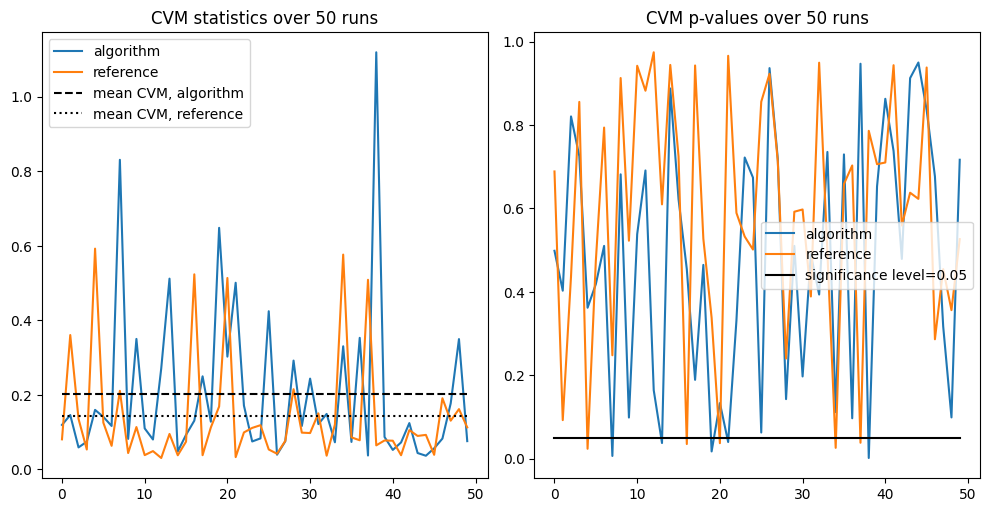

In [ ]:
# multiple runs of CVM test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha05_beta9[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha05_beta9_gen[(i * 2000):((i+1)*2000)]
  result = stats.cramervonmises(numbers, 'gamma', args=(alpha, 0, beta))
  cvm_statistic, cvm_p_value = result.statistic, result.pvalue
  statistic.append(cvm_statistic)
  pvalues.append(cvm_p_value)
  result = stats.cramervonmises(numbers_ref, 'gamma', args=(alpha, 0, beta))
  cvm_statistic_ref, cvm_p_value_ref = result.statistic, result.pvalue
  statistic_ref.append(cvm_statistic_ref)
  pvalues_ref.append(cvm_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_cvm_alg = np.array(statistic).mean()
print("mean CVM for algorithm: ", mean_cvm_alg)
mean_cvm_ref = np.array(statistic_ref).mean()
print("mean CVM for reference: ", mean_cvm_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_cvm_alg for _ in x_axis], label="mean CVM, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_cvm_ref for _ in x_axis], label="mean CVM, reference", linestyle="dotted", color='black')
ax1.legend()

print(pvalues)
ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("CVM statistics over 50 runs")
ax2.set_title("CVM p-values over 50 runs")
plt.show()

# Data rescale
To apply AD and BE test, we need to rescale data with division by beta

In [ ]:
import os
filename = 'dataref_100000_alpha05_beta9.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_alpha05_beta9_gen))
    file.write(content)

In [ ]:
for i in range(0, N):
  data_100000_alpha05_beta9[i] = data_100000_alpha05_beta9[i]/beta

filename = 'data_N100000_alpha05_beta9_scaled.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_100000_alpha05_beta9))
    file.write(content)

In [ ]:
for i in range(0, N):
  data_alpha05_beta9_gen[i] = data_alpha05_beta9_gen[i]/beta

filename = 'dataref_100000_alpha05_beta9_scaled.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_alpha05_beta9_gen))
    file.write(content)

**Tests results for Gamma(0.5, 0, 9)**

mean AD-deviation for algorithm under study:  1.12573016
mean AD-deviation for reference:  1.172757746


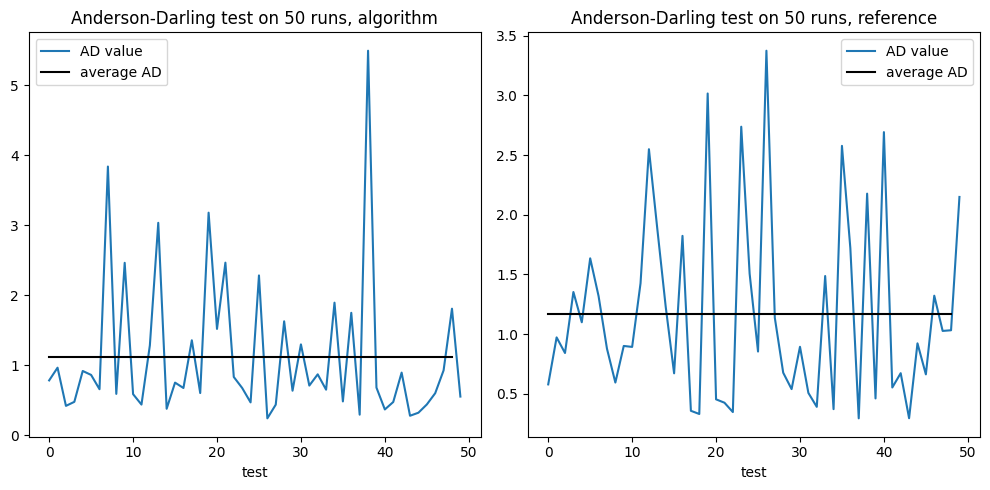

In [ ]:
#AD multiple runs

ad_stats = list(map(float,"0.7842299 0.9660033 0.4201542 0.4778855 0.9190158 0.8624335 0.6581533 3.8406153 0.5916254 2.4648305 0.5878831 0.4388770 1.2854692 3.0364931 0.3786063 0.7527125 0.6758164 1.3574301 0.6036534 3.1812944 1.5201569 2.4669841 0.8333625 0.6759554 0.4700578 2.2844096 0.2421423 0.4377713 1.6287150 0.6372335 1.2991455 0.7103078 0.8709586 0.6517914 1.8951756 0.4839326 1.7502496 0.2945180 5.4957047 0.6811780 0.3691887 0.4755194 0.8957466 0.2790622 0.3225871 0.4400581 0.6012333 0.9277364 1.8091135 0.5533303".split()))
# ad_cv = list(map(float,"0.8452438 0.8576967 0.7576185 0.8433877 0.8982714 0.9496808 0.9856162 0.9241235 0.8717404 0.9507858 0.7332129 0.7590937 1.0607690 0.8517286 0.7366930 0.8419833 0.9030099 0.7739122 0.7639679 1.0245302 0.7716508 0.8352066 0.8281916 1.0407065 0.7365587 0.9147223 0.6465532 0.6823733 0.8946088 0.7841729 0.8625365 0.9005932 0.9279332 0.9055409 0.8483079 0.8311940 0.8807507 0.8244662 0.8155531 0.7340272 0.8709722 0.9962443 0.7585683 0.8562788 0.9157802 0.8058595 0.7915023 0.7276516 0.8921483 0.7799861".split()))
mean_ad_alg = np.array(ad_stats).mean()

ad_stats_ref = list(map(float,"0.5795576 0.9731204 0.8424829 1.3533537 1.0997588 1.6355434 1.3191118 0.8787685 0.5949450 0.9014295 0.8934563 1.4265370 2.5494121 1.8813080 1.2296756 0.6722221 1.8235958 0.3582488 0.3315899 3.0160924 0.4542791 0.4260295 0.3477823 2.7379104 1.5062905 0.8546643 3.3744365 1.1376693 0.6774452 0.5400508 0.8944957 0.5080162 0.3914286 1.4872938 0.3721483 2.5775149 1.7212284 0.2951340 2.1772444 0.4618874 2.6925893 0.5534817 0.6734082 0.2961332 0.9234430 0.6633536 1.3225949 1.0272875 1.0329191 2.1495176".split()))
# ad_cv_ref = list(map(float,"0.8254338 0.8421753 0.8145671 0.8483737 0.7772061 0.8919218 0.8229256 0.7906493 0.7114712 0.7847850 0.8392406 0.8304296 0.7718717 0.7753568 0.8874260 0.9243733 0.9825328 1.0627020 0.7755070 0.8756207 0.9708771 0.6730245 0.7993765 1.0767266 0.8222487 0.7642217 0.8482504 0.8562085 0.9071719 0.9205529 0.9647368 0.7049426 0.7926027 0.7741891 0.9769272 1.0339231 0.8134387 0.8305934 0.8379020 1.0176328 0.9098485 0.8786115 0.7670276 1.0826818 0.8394346 0.8363629 0.7497523 0.9827870 0.9959828 0.8643911".split()))
mean_ad_ref = np.array(ad_stats_ref).mean()

print("mean AD-deviation for algorithm under study: ", mean_ad_alg)
print("mean AD-deviation for reference: ", mean_ad_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, ad_stats, label='AD value')
# ax1.plot(x_axis, ad_cv, label='AD critical values')
ax1.plot([mean_ad_alg for i in range (0,49)], label='average AD', color='black')
ax1.set_title('Anderson-Darling test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, ad_stats_ref, label='AD value')
# ax2.plot(x_axis, ad_cv_ref, label='AD critical values')
ax2.plot([mean_ad_ref for i in range (0,49)], label='average AD', color='black')
ax2.set_title('Anderson-Darling test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()

mean BE-deviation for algorithm under study:  0.145730119
mean BE-deviation for reference:  0.1510980424


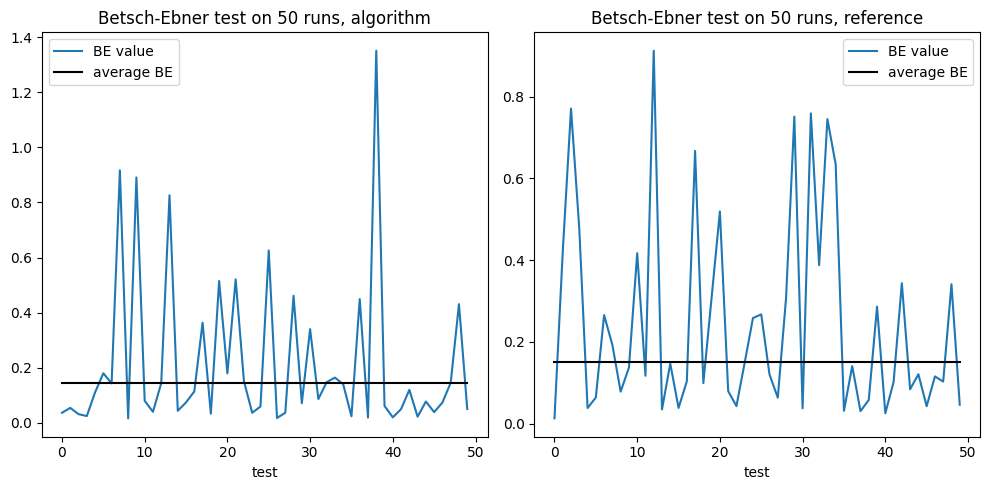

In [ ]:
#BE multiple runs

ad_stats = list(map(float,"0.10739164 0.15233712 0.03754909 0.06445913 0.15800587 0.09030579 0.07310443 0.57258550 0.06741749 0.17586117 0.08897113 0.05965892 0.24559397 0.40038998 0.02458923 0.06081786 0.07866324 0.16985122 0.08451755 0.57088016 0.27976347 0.32827549 0.11177398 0.05770829 0.04334757 0.27553086 0.02362626 0.06050220 0.16043114 0.07759690 0.15405924 0.08621755 0.07947818 0.04715526 0.29474687 0.04760977 0.19163663 0.02419364 0.85912155 0.04555644 0.04800846 0.03358230 0.10846252 0.02725708 0.01566895 0.03224577 0.06923657 0.09254902 0.27582813 0.05238537".split()))
# ad_cv = list(map(float,"0.2464950 0.2382469 0.3095434 0.2374585 0.1904768 0.1884343 0.2458927 0.1939474 0.1861322 0.2567536 0.2212135 0.2351751 0.2113849 0.2802157 0.2003188 0.2247097 0.1771058 0.2052226 0.2077088".split()))
mean_be_alg = np.array(ad_stats).mean()

ad_stats_ref = list(map(float,"0.03938296 0.14140997 0.05188378 0.12299073 0.07467008 0.24860135 0.17320250 0.07135850 0.08264860 0.06247718 0.14621800 0.18482864 0.49765705 0.18800706 0.17236649 0.04606145 0.16222605 0.04073052 0.02238849 0.46190523 0.05094104 0.03978287 0.03670528 0.43466816 0.16423149 0.08124929 0.63193446 0.10801591 0.07744792 0.06366149 0.03839598 0.04519162 0.02812242 0.11971880 0.04696699 0.44054735 0.12025224 0.02545840 0.42089438 0.05004099 0.48640118 0.03164516 0.08583483 0.02277023 0.15274670 0.06781016 0.06532346 0.12593171 0.14462570 0.35657128".split()))
# ad_cv_ref = list(map(float,"0.2484105 0.1735574 0.2104858 0.2137090 0.2461563 0.2357998 0.2753320 0.1818419 0.1866172 0.2639730 0.2495413 0.2390002 0.2480216 0.2425866 0.2498247 0.1929178 0.2687811 0.3279358 0.2692483".split()))
mean_be_ref = np.array(ad_stats_ref).mean()

print("mean BE-deviation for algorithm under study: ", mean_be_alg)
print("mean BE-deviation for reference: ", mean_be_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, be_stats_alg, label='BE value')
# ax1.plot(x_axis, ad_cv, label='BE critical values')
ax1.plot([mean_be_alg for i in range (0,50)], label='average BE', color='black')
ax1.set_title('Betsch-Ebner test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, be_stats_ref, label='BE value')
# ax2.plot(x_axis, ad_cv_ref, label='BE critical values')
ax2.plot([mean_be_ref for i in range (0,50)], label='average BE', color='black')
ax2.set_title('Betsch-Ebner test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("N=100000, shape=2, shift=0, scale=1")
print("")
df = pd.DataFrame([[mean_ks_alg, mean_cvm_alg, mean_ad_alg, mean_be_alg], [mean_ks_ref, mean_cvm_ref, mean_ad_ref, mean_be_ref]],
                  columns=['KS', 'CVM', 'AD', 'BE'],
                  index=['algorithm', 'reference'])

print(df)

print("")
df1 = pd.DataFrame([[mean_ks_ref/mean_ks_alg, mean_cvm_ref/mean_cvm_alg, mean_ad_ref/mean_ad_alg, mean_be_ref/mean_be_alg]],
                  columns=['KS ratio', 'CVM ratio', 'AD ratio', 'BE ratio'],
                  index=['ratio'])

print(df1)

N=100000, shape=2, shift=0, scale=1

                 KS       CVM        AD        BE
algorithm  0.020400  0.201699  1.125730  0.145730
reference  0.018106  0.142819  1.172758  0.151098

       KS ratio  CVM ratio  AD ratio  BE ratio
ratio  0.887569   0.708079  1.041775  1.036835


# Gamma distribution with N=100000 samples with shape=0.01 and scale=1

In [78]:
with open('/content/data_N100000_alpha001_beta1.txt', 'r') as file:
    content = file.read()
    numbers_list = content.split()
    data_100000_alpha001_beta1 = [float(number) for number in numbers_list[:100000]]

In [84]:
for i in range(0,N):
  if data_100000_alpha001_beta1[i] == 0:
    data_100000_alpha001_beta1[i] = 1e-128

import os
filename = '/content/data_N100000_alpha001_beta1.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_100000_alpha001_beta1))
    file.write(content)

In [39]:
data_100000_alpha001_beta1[0:100]

[1e-128,
 5.743746e-26,
 1e-128,
 4.115788e-10,
 7.823922e-25,
 3.396118e-25,
 4.959315e-06,
 0.03641431,
 2.668507e-32,
 7.793797e-32,
 5.903985e-08,
 1.648435e-34,
 3.117244e-19,
 1.571015e-05,
 1e-128,
 1e-128,
 1e-128,
 1e-128,
 2.621547e-09,
 1e-128,
 1.807675e-43,
 1e-128,
 5.725329e-14,
 2.330993e-21,
 1e-128,
 6.749541e-36,
 2.287663e-25,
 7.001252e-28,
 6.26827e-19,
 3.816657e-27,
 2.590324e-31,
 7.821095e-40,
 1e-128,
 6.07215e-09,
 1e-128,
 1e-128,
 8.766297e-25,
 1.308254e-14,
 1e-128,
 2.441907e-35,
 1e-128,
 0.001360968,
 6.432892e-34,
 1e-128,
 1e-128,
 0.0005061403,
 7.111224e-27,
 0.002687265,
 1.618366e-05,
 1e-128,
 7.604407e-33,
 1e-128,
 1e-128,
 1e-128,
 1e-128,
 1e-128,
 7.242534e-26,
 1e-128,
 1e-128,
 1e-128,
 1e-128,
 5.634061e-41,
 6.391496e-19,
 1e-128,
 2.802597e-45,
 1e-128,
 1e-128,
 6.586103e-44,
 1e-128,
 0.0002801463,
 1e-128,
 1.446723e-32,
 2.073922e-43,
 5.013304e-28,
 1e-128,
 4.5162e-14,
 1e-128,
 0.02247378,
 1e-128,
 1e-128,
 1e-128,
 8.331703e-

In [40]:
N = 100000
alpha = 0.01
beta = 1.0

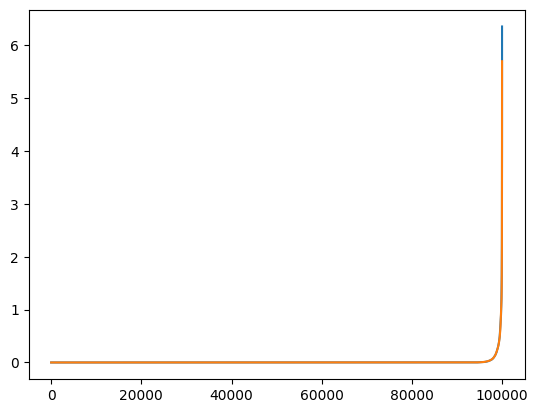

In [75]:
sorted_nums = data_100000_alpha001_beta1

plt.plot([i for i in range(0,100000)], sorted_nums)
plt.plot([i for i in range(0,100000)], data_alpha001_beta1_gen)

In [74]:
data_alpha001_beta1_gen.sort()
data_alpha001_beta1_gen

array([0.       , 0.       , 0.       , ..., 4.2589954, 5.4361814,
       5.6954414])

In [13]:
%%time
data_alpha001_beta1_gen = np.random.gamma(alpha, beta, N)

CPU times: user 10.3 ms, sys: 849 µs, total: 11.2 ms
Wall time: 10.8 ms


In [16]:
%%time
data_alpha001_beta1_gen = gamma.rvs(a=alpha, scale=beta, size=N)

CPU times: user 11.2 ms, sys: 1.91 ms, total: 13.1 ms
Wall time: 32.3 ms


In [81]:
%%time
uniform_random_numbers = np.random.uniform(0, 1, N)
data_alpha001_beta1_gen = gamma.ppf(uniform_random_numbers, a=alpha, scale=beta)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 157 ms


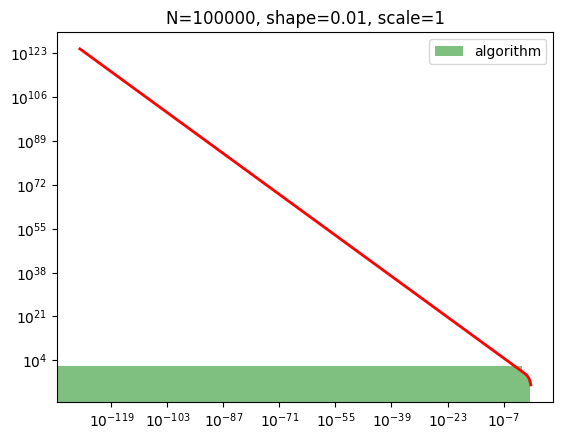

In [92]:
data_alpha001_beta1_gen = np.random.gamma(alpha, beta, N)


# uniform_random_numbers = np.random.uniform(0, 1, N)
# data_alpha2_beta1_gen = gamma.ppf(uniform_random_numbers, a=alpha, scale=beta)


# data_alpha2_beta1_gen = gamma.rvs(a=alpha, scale=beta, size=N)


count, bins, ignored = plt.hist(data_100000_alpha001_beta1, 400, density=True, log=True, alpha=0.5, color='g', label='algorithm')
# count2, bins2, ignored2 = plt.hist(data_alpha001_beta1_gen, 400, density=True, log=True, alpha=0.5, color='b', label='reference')
# # y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)


gamma_theor = np.linspace(min(data_100000_alpha001_beta1), max(data_100000_alpha001_beta1), N)
y = stats.gamma.pdf(gamma_theor, alpha, 0, beta)
plt.plot(gamma_theor, stats.gamma.pdf(gamma_theor, alpha, 0, beta), 'r-', lw=2)
plt.xscale('log')
plt.title('N=100000, shape=0.01, scale=1')
plt.legend()
plt.show()

Text(0.5, 1.0, 'reference: N=100, shape=0.01, shift=0, scale=1')

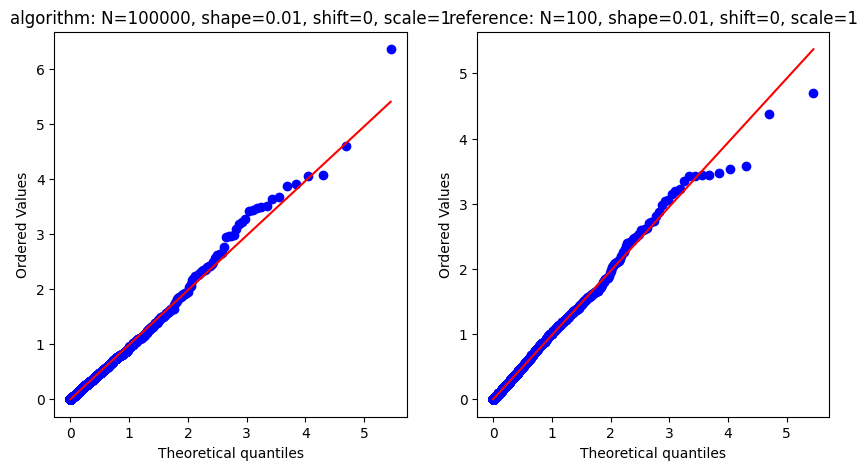

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

stats.probplot(data_100000_alpha001_beta1, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[0])
axs[0].set_title('algorithm: N=100000, shape=0.01, shift=0, scale=1')

stats.probplot(data_alpha001_beta1_gen, dist=stats.gamma, sparams=(alpha, 0, beta), plot=axs[1])
axs[1].set_title('reference: N=100000, shape=0.01, shift=0, scale=1')

mean KS for algorithm:  0.30396977110210976
mean KS for reference:  0.019265447664888736


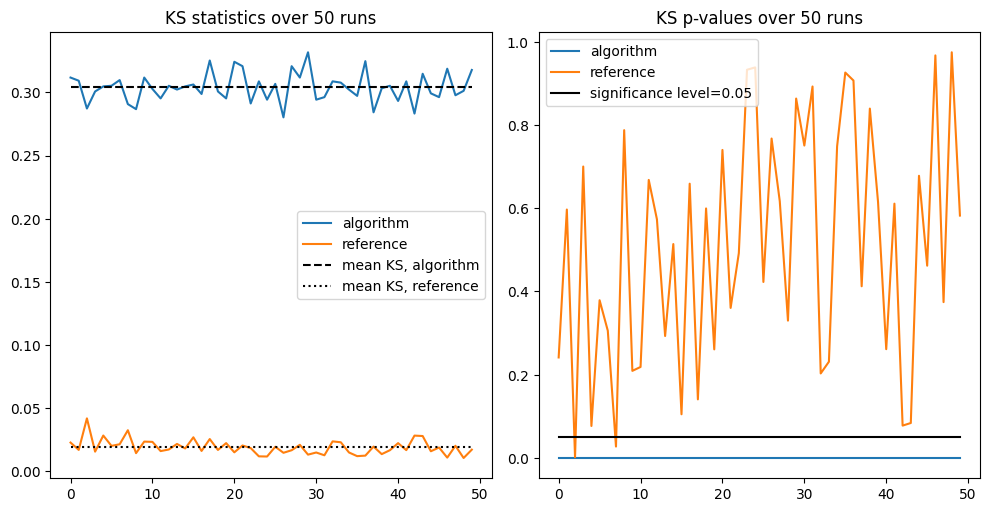

In [82]:
# multiple runs of KS test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha001_beta1[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha001_beta1_gen[(i * 2000):((i+1)*2000)]
  ks_statistic, ks_p_value = stats.kstest(numbers, 'gamma', args=(alpha, 0, beta))
  statistic.append(ks_statistic)
  pvalues.append(ks_p_value)
  ks_statistic_ref, ks_p_value_ref = stats.kstest(numbers_ref, 'gamma', args=(alpha, 0, beta))
  statistic_ref.append(ks_statistic_ref)
  pvalues_ref.append(ks_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_ks_alg = np.array(statistic).mean()
print("mean KS for algorithm: ", mean_ks_alg)
mean_ks_ref = np.array(statistic_ref).mean()
print("mean KS for reference: ", mean_ks_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_ks_alg for _ in x_axis], label="mean KS, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_ks_ref for _ in x_axis], label="mean KS, reference", linestyle="dotted", color='black')
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("KS statistics over 50 runs")
ax2.set_title("KS p-values over 50 runs")
plt.show()

In [22]:
ks_statistic, ks_p_value = stats.kstest(data_alpha001_beta1_gen, 'gamma', args=(alpha, 0, beta))

mean CVM for algorithm:  19.01936728911136
mean CVM for reference:  0.16505520171679852


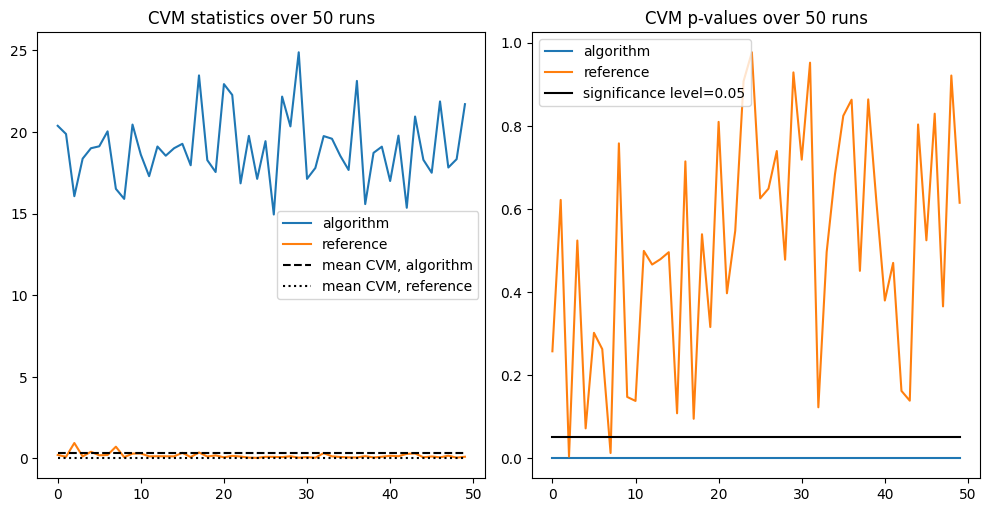

In [83]:
# multiple runs of CVM test

statistic = []
statistic_ref = []
pvalues = []
pvalues_ref = []
for i in range(0, 50):
  numbers = data_100000_alpha001_beta1[(i * 2000):((i+1)*2000)]
  numbers_ref = data_alpha001_beta1_gen[(i * 2000):((i+1)*2000)]
  result = stats.cramervonmises(numbers, 'gamma', args=(alpha, 0, beta))
  cvm_statistic, cvm_p_value = result.statistic, result.pvalue
  statistic.append(cvm_statistic)
  pvalues.append(cvm_p_value)
  result = stats.cramervonmises(numbers_ref, 'gamma', args=(alpha, 0, beta))
  cvm_statistic_ref, cvm_p_value_ref = result.statistic, result.pvalue
  statistic_ref.append(cvm_statistic_ref)
  pvalues_ref.append(cvm_p_value_ref)

x_axis = np.linspace(0, 49, 50)

mean_cvm_alg = np.array(statistic).mean()
print("mean CVM for algorithm: ", mean_cvm_alg)
mean_cvm_ref = np.array(statistic_ref).mean()
print("mean CVM for reference: ", mean_cvm_ref)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x_axis, statistic, label="algorithm")
ax1.plot(x_axis, statistic_ref, label="reference")
ax1.plot(x_axis, [mean_ks_alg for _ in x_axis], label="mean CVM, algorithm", linestyle="dashed", color='black')
ax1.plot(x_axis, [mean_ks_ref for _ in x_axis], label="mean CVM, reference", linestyle="dotted", color='black')
ax1.legend()

ax2.plot(x_axis, pvalues, label="algorithm")
ax2.plot(x_axis, pvalues_ref, label="reference")
ax2.plot(x_axis, [0.05 for i in range(0,50)], label="significance level=0.05", color="black")
ax2.legend()


plt.tight_layout()
ax1.set_title("CVM statistics over 50 runs")
ax2.set_title("CVM p-values over 50 runs")
plt.show()

In [85]:
import os
filename = 'dataref_100000_alpha001_beta1.txt'
if os.path.exists(filename):
    os.remove(filename)

with open(filename, 'w') as file:
    content = ' '.join(map(str, data_alpha001_beta1_gen))
    file.write(content)

In [ ]:
#AD multiple runs

ad_stats = list(map(float,"68206.98 66626.19 62858.72 64838.22 66125.22 67116.43 65996.90 64604.61 63760.06 68544.49 65959.93 64814.43 65918.34 66052.98 66356.09 66900.96 64828.28 71471.47 65620.48 63316.67 70062.55 69941.29 63057.28 67553.29 64479.15 65832.37 61954.38 69298.31 67955.66 72155.59 65029.25 63365.96 66854.32 66298.16 65653.49 65092.64 70191.26 62487.36 66439.77 66990.18 64015.10 67580.54 62729.37 68505.28 63826.55 65532.94 69349.79 64473.95 66097.39 69797.73".split()))
ad_cv = list(map(float,"0.8873682 0.7853501 0.8125600 0.9402123 0.8626509 0.7926557 0.8122357 0.7790547 0.8092150 0.6703791 0.9630632 0.8785890 0.7977452 0.7736019 0.8305409 0.7889315 0.7866467 1.0371091 0.7436924 0.7904200 0.7776918 0.6980301 0.7282169 0.7460483 0.7694058 0.7149444 0.6670058 0.7527578 0.8924772 0.7977755 0.8431762 0.8100922 0.7623644 0.8739661 0.7639338 0.8584294 0.6627428 0.7000587 0.7072018 0.6543897 0.6568052 0.8520273 0.9345899 0.7262391 0.6902170 0.8246653 0.7856527 0.8437335 0.8681795 0.6429837".split()))
mean_alg = np.array(ad_stats).mean()
print("mean AD for algorithm: ", mean_alg)

ad_stats_ref = list(map(float,"0.3394173 0.1861615 0.4010498 0.2103109 0.7206832 0.4743428 0.5863437 0.3080843 0.3442630 0.3701558 0.3537018 0.1501279 0.2229872 0.2663563 0.2583741 0.1877346 0.2525133 0.5794729 0.5166289 0.3208189 0.3010987 0.5910042 0.2921522 0.6260241 0.3237333 0.3085743 0.5480926 0.3429178 0.2873610 0.7327714 0.3285296 0.3792323 0.2997698 0.4501067 0.3226764 0.3685708 0.2355031 0.6753462 0.2469687 0.1461538 0.2615120 0.1544048 0.3121069 0.2837502 0.6539976 0.1454299 0.5596982 0.5858231 0.2128808 0.3688275".split()))
ad_cv_ref = list(map(float,"0.7162020 0.7352680 0.6857911 0.6437870 0.7861667 0.5998160 0.8894133 0.7269142 0.7278163 0.9731662 0.6031121 0.7688138 0.7009824 0.7178924 0.9307517 0.9771922 0.6681681 0.8231708 0.8450746 0.7378359 0.7419405 0.8140616 0.7461559 0.7410040 0.7433889 0.7604771 0.8328936 0.7855385 0.7147045 0.9067903 0.8538049 0.6653043 0.8839467 0.9029454 0.9214025 0.8007555 1.0003786 1.0075623 0.8231269 0.8161558 0.7486464 0.7349707 0.7404036 0.7634851 0.8136084 0.8416072 0.7939866 0.7460413 0.7157942 0.9129765".split()))
mean_ref = np.array(ad_stats_ref).mean()
print("mean AD for reference: ", mean_ref)

x_axis = np.linspace(0, 49, 50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x_axis, ad_stats, label='AD value')
ax1.plot(x_axis, ad_cv, label='AD critical values')
ax1.plot([mean_alg for i in range (0,49)], label='average AD')
ax1.set_title('Anderson-Darling test on 50 runs, algorithm')
ax1.set_xlabel('test')
ax1.legend()

ax2.plot(x_axis, ad_stats_ref, label='AD value')
ax2.plot(x_axis, ad_cv_ref, label='AD critical values')
ax2.plot([mean_ref for i in range (0,49)], label='average AD')
ax2.set_title('Anderson-Darling test on 50 runs, reference')
ax2.set_xlabel('test')
ax2.legend()

plt.tight_layout()
plt.show()